In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt

import src.utils as utils

In [2]:
data_list = [
    os.path.join("/home/schiavazza/data/hpe/fault_button/osai/fault_button", "s1_v1"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/osai/fault_button", "s1_v2"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/osai/fault_button", "s2_v1"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/osai/fault_button", "s2_v2"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/binary/long", "button2"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/binary/long", "button3"),
    os.path.join("/home/schiavazza/data/hpe/fault_button/binary/long", "button4"),
    # f"/home/schiavazza/data/hpe/fault_button/APRIL/exp01/data",
    # f"/home/schiavazza/data/hpe/fault_button/APRIL/exp02/data",
    # f"/home/schiavazza/data/hpe/fault_button/APRIL/exp03/data",
]

In [3]:
scale = 1.0
dataset_tres_ls = [10**(-x) for x in np.linspace(1, 4, 20)]
base_thresh = 9

total_diff = np.empty((20, ), dtype='object')
total_missed = np.empty((20, ), dtype='object')
total_false = np.empty((20, ), dtype='object')

for path in data_list:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_tres(base_thresh, scale, dataset_tres_ls)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1/info.log


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2/info.log


100%|██████████| 20/20 [00:11<00:00,  1.69it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1/info.log


100%|██████████| 20/20 [00:07<00:00,  2.83it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2/info.log


100%|██████████| 20/20 [00:05<00:00,  3.86it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/binary/long/button2
Examining info.log: /home/schiavazza/data/hpe/fault_button/binary/long/button2/info.log


100%|██████████| 20/20 [00:06<00:00,  3.02it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/binary/long/button3
Examining info.log: /home/schiavazza/data/hpe/fault_button/binary/long/button3/info.log


100%|██████████| 20/20 [00:11<00:00,  1.67it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/binary/long/button4
Examining info.log: /home/schiavazza/data/hpe/fault_button/binary/long/button4/info.log


100%|██████████| 20/20 [00:11<00:00,  1.68it/s]


In [4]:
u_diff = np.zeros((20,), dtype=float)
std_diff = np.zeros((20,), dtype=float)

u_false = np.zeros((20,), dtype=float)
std_false = np.zeros((20,), dtype=float)

u_missed = np.zeros((20,), dtype=float)
std_missed = np.zeros((20,), dtype=float)

for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff[i] = np.nanmean(tmp)
    std_diff[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false[i] = np.nanmean(tmp)
    std_false[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed[i] = np.nanmean(tmp)
    std_missed[i] = np.nanstd(tmp)

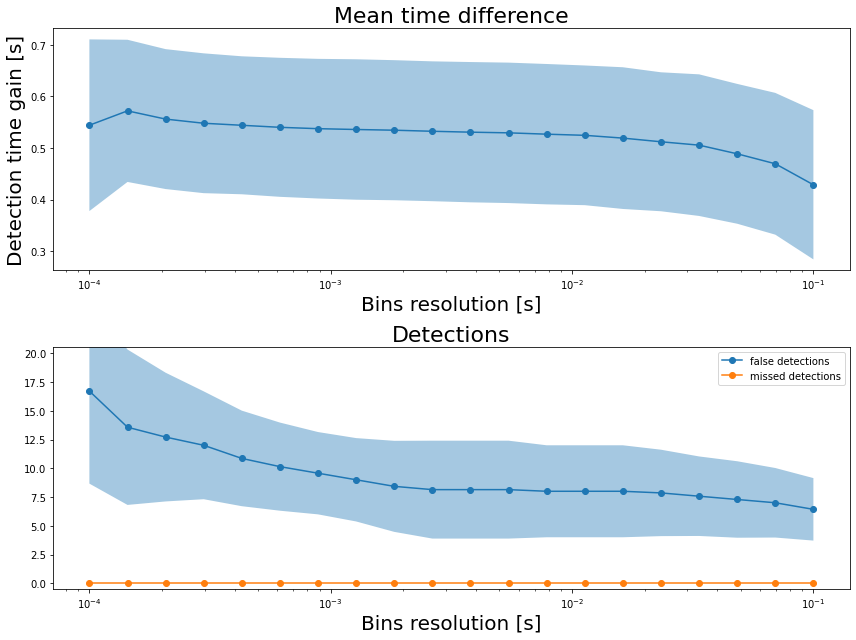

In [6]:
fig = plt.figure(figsize=(12, 9))
        
ax = fig.add_subplot(2, 1, 1)
ax.plot(dataset_tres_ls, u_diff, marker="o")
ax.fill_between(dataset_tres_ls, u_diff-std_diff, u_diff+std_diff, alpha=0.4)
ax.set_xticks(dataset_tres_ls)
ax.set_xscale('log')
ax.set_xlabel("Bins resolution [s]", fontsize=20)
ax.set_ylabel("Detection time gain [s]", fontsize=20)
ax.set_title("Mean time difference", fontsize=22);

ax = fig.add_subplot(2, 1, 2)
ax.plot(dataset_tres_ls, u_false, marker="o", label="false detections")
ax.fill_between(dataset_tres_ls, u_false-std_false, u_false+std_false, alpha=0.4)

ax.plot(dataset_tres_ls, u_missed, marker="o", label="missed detections")
ax.fill_between(dataset_tres_ls, u_missed-std_missed, u_missed+std_missed, alpha=0.4)

ax.set_xticks(dataset_tres_ls)
# ax.set_yticks(n_detections)
ymax = max(max(false_detections + std_false), max(missed_detections + std_missed))
ax.set_ylim([-0.5, ymax + 0.5])
ax.set_xscale('log')
ax.set_xlabel("Bins resolution [s]", fontsize=20)
# ax.set_ylabel("number of detections", fontsize=20)
ax.set_title("Detections", fontsize=22);
ax.legend()
plt.tight_layout()

In [9]:
scales = np.linspace(3.0, 0.3, 20)
dataset_tres = 0.01
base_thresh = 9

total_diff = np.empty((20, ), dtype='object')
total_missed = np.empty((20, ), dtype='object')
total_false = np.empty((20, ), dtype='object')

for path in data_list:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_scale(base_thresh, scales, dataset_tres)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff = np.zeros((20,), dtype=float)
std_diff = np.zeros((20,), dtype=float)

u_false = np.zeros((20,), dtype=float)
std_false = np.zeros((20,), dtype=float)

u_missed = np.zeros((20,), dtype=float)
std_missed = np.zeros((20,), dtype=float)

for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff[i] = np.nanmean(tmp)
    std_diff[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false[i] = np.nanmean(tmp)
    std_false[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed[i] = np.nanmean(tmp)
    std_missed[i] = np.nanstd(tmp)

importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1/info.log


100%|██████████| 20/20 [01:13<00:00,  3.65s/it]
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:455: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  std_times  = np.array([np.nanstd(d) for d in differences_ls])


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2/info.log


100%|██████████| 20/20 [01:10<00:00,  3.54s/it]
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:456: RuntimeWarning: Mean of empty slice
  
/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1/info.log


100%|██████████| 20/20 [00:59<00:00,  2.98s/it]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2/info.log


100%|██████████| 20/20 [00:43<00:00,  2.16s/it]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/binary/long/button2
Examining info.log: /home/schiavazza/data/hpe/fault_button/binary/long/button2/info.log


100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/binary/long/button3
Examining info.log: /home/schiavazza/data/hpe/fault_button/binary/long/button3/info.log


100%|██████████| 20/20 [00:23<00:00,  1.15s/it]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/binary/long/button4
Examining info.log: /home/schiavazza/data/hpe/fault_button/binary/long/button4/info.log


100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


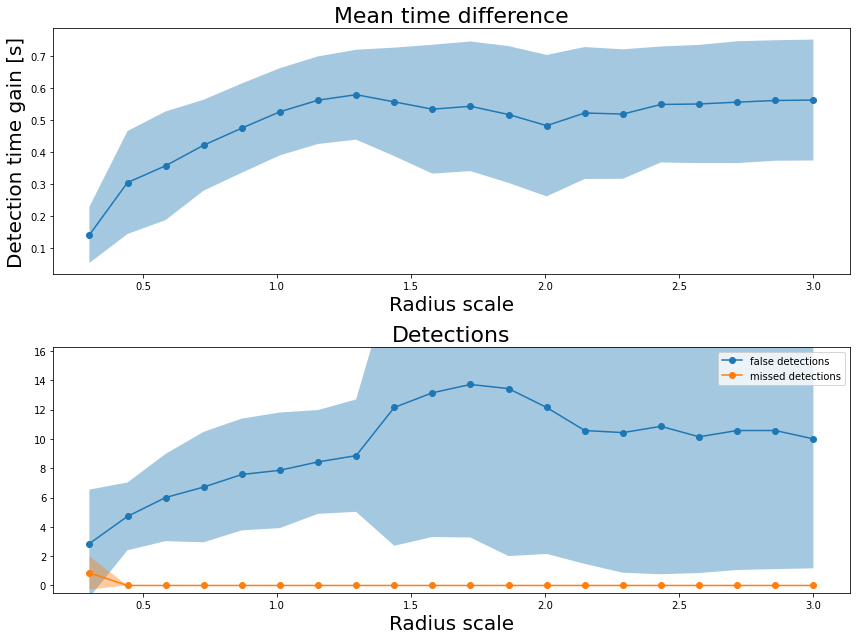

In [15]:
fig = plt.figure(figsize=(12, 9))
        
ax = fig.add_subplot(2, 1, 1)
ax.plot(scales, u_diff, marker="o")
ax.fill_between(scales, u_diff-std_diff, u_diff+std_diff, alpha=0.4)
# ax.set_xticks(scales)
# ax.set_xscale('log')
ax.set_xlabel("Radius scale", fontsize=20)
ax.set_ylabel("Detection time gain [s]", fontsize=20)
ax.set_title("Mean time difference", fontsize=22);

ax = fig.add_subplot(2, 1, 2)
ax.plot(scales, u_false, marker="o", label="false detections")
ax.fill_between(scales, u_false-std_false, u_false+std_false, alpha=0.4)

ax.plot(scales, u_missed, marker="o", label="missed detections")
ax.fill_between(scales, u_missed-std_missed, u_missed+std_missed, alpha=0.4)

# ax.set_xticks(scales)
# ax.set_yticks(n_detections)
ymax = max(max(false_detections + std_false), max(missed_detections + std_missed))
ax.set_ylim([-0.5, ymax + 0.5])
# ax.set_xscale('log')
ax.set_xlabel("Radius scale", fontsize=20)
# ax.set_ylabel("number of detections", fontsize=20)
ax.set_title("Detections", fontsize=22);
ax.legend()
plt.tight_layout()

In [19]:
scale = 1.0
dataset_tres = 0.01
base_thresh_ls = np.linspace(5, 20, 20)

total_diff = np.empty((20, ), dtype='object')
total_missed = np.empty((20, ), dtype='object')
total_false = np.empty((20, ), dtype='object')

for path in data_list:
    plotter = utils.Plotter(path)
    diffs, false_detections, missed_detections = plotter.compute_stats_thresh(base_thresh_ls, scale, dataset_tres)

    for i, t in enumerate(diffs):
        total_diff[i] = np.append(total_diff[i], t)
    for i, t in enumerate(false_detections):
        total_false[i] = np.append(total_false[i], t)
    for i, t in enumerate(missed_detections):
        total_missed[i] = np.append(total_missed[i], t)

u_diff = np.zeros((20,), dtype=float)
std_diff = np.zeros((20,), dtype=float)

u_false = np.zeros((20,), dtype=float)
std_false = np.zeros((20,), dtype=float)

u_missed = np.zeros((20,), dtype=float)
std_missed = np.zeros((20,), dtype=float)

for i, _ in enumerate(total_diff):
    tmp = np.array(total_diff[i], dtype=float)
    u_diff[i] = np.nanmean(tmp)
    std_diff[i] = np.nanstd(tmp)

    tmp = np.array(total_false[i], dtype=float)
    u_false[i] = np.nanmean(tmp)
    std_false[i] = np.nanstd(tmp)

    tmp = np.array(total_missed[i], dtype=float)
    u_missed[i] = np.nanmean(tmp)
    std_missed[i] = np.nanstd(tmp)

importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1/info.log


100%|██████████| 20/20 [00:05<00:00,  3.42it/s]
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:498: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  differences_ls = np.array(differences_ls)
/home/schiavazza/code/EDPR-APRIL/fault_button/eventrate_test/src/utils.py:499: RuntimeWarning: Mean of empty slice
  mean_times = np.array([np.nanmean(d) for d in differences_ls])
/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v2/info.log


100%|██████████| 20/20 [00:05<00:00,  3.88it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v1/info.log


100%|██████████| 20/20 [00:03<00:00,  5.66it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s2_v2/info.log


100%|██████████| 20/20 [00:02<00:00,  6.96it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/binary/long/button2
Examining info.log: /home/schiavazza/data/hpe/fault_button/binary/long/button2/info.log


100%|██████████| 20/20 [00:03<00:00,  5.55it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/binary/long/button3
Examining info.log: /home/schiavazza/data/hpe/fault_button/binary/long/button3/info.log


100%|██████████| 20/20 [00:06<00:00,  2.98it/s]


importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/binary/long/button4
Examining info.log: /home/schiavazza/data/hpe/fault_button/binary/long/button4/info.log


100%|██████████| 20/20 [00:06<00:00,  2.99it/s]


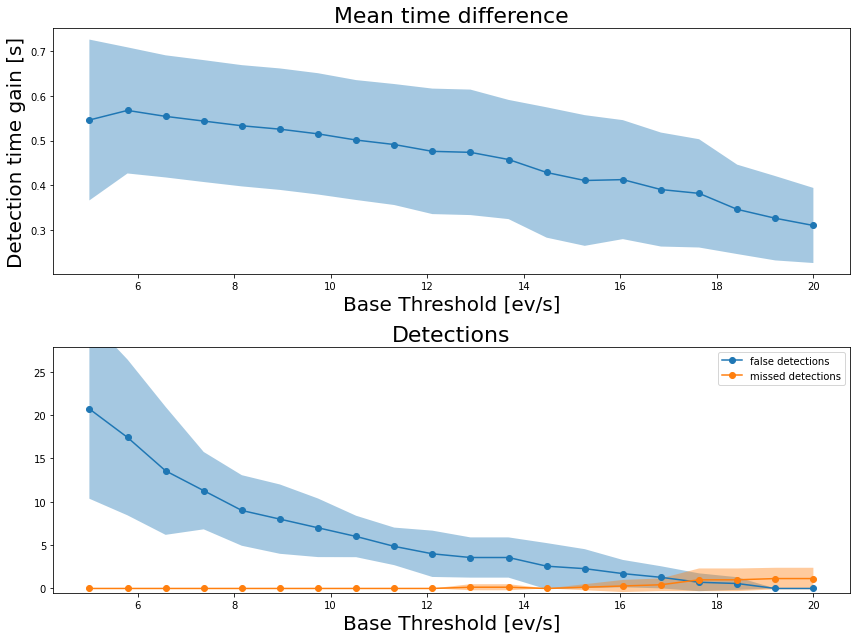

In [21]:
fig = plt.figure(figsize=(12, 9))
        
ax = fig.add_subplot(2, 1, 1)
ax.plot(base_thresh_ls, u_diff, marker="o")
ax.fill_between(base_thresh_ls, u_diff-std_diff, u_diff+std_diff, alpha=0.4)
# ax.set_xticks(base_thresh_ls)
# ax.set_xscale('log')
ax.set_xlabel("Base Threshold [ev/s]", fontsize=20)
ax.set_ylabel("Detection time gain [s]", fontsize=20)
ax.set_title("Mean time difference", fontsize=22);

ax = fig.add_subplot(2, 1, 2)
ax.plot(base_thresh_ls, u_false, marker="o", label="false detections")
ax.fill_between(base_thresh_ls, u_false-std_false, u_false+std_false, alpha=0.4)

ax.plot(base_thresh_ls, u_missed, marker="o", label="missed detections")
ax.fill_between(base_thresh_ls, u_missed-std_missed, u_missed+std_missed, alpha=0.4)

# ax.set_xticks(base_thresh_ls)
# ax.set_yticks(n_detections)
ymax = max(max(false_detections + std_false), max(missed_detections + std_missed))
ax.set_ylim([-0.5, ymax + 0.5])
# ax.set_xscale('log')
ax.set_xlabel("Base Threshold [ev/s]", fontsize=20)
# ax.set_ylabel("number of detections", fontsize=20)
ax.set_title("Detections", fontsize=22);
ax.legend()
plt.tight_layout()

importIitYarp trying path: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1
Examining info.log: /home/schiavazza/data/hpe/fault_button/osai/fault_button/s1_v1/info.log


KeyboardInterrupt: 

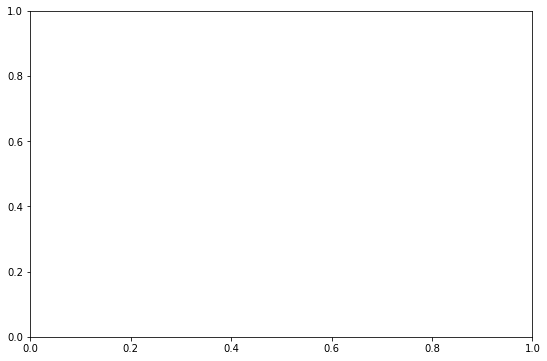

In [31]:
scale = 1.0
dataset_tres = 0.01
base_thresh = 9

path = os.path.join("/home/schiavazza/data/hpe/fault_button/osai/fault_button", "s1_v1")

plotter = utils.Plotter(path)
plotter.plot_hist(base_thresh, dataset_tres, scale, "s1_v1")
